# LENEAR REGRESSION ASSIGNMENT

In [6]:
# from matplotlib import pyplot as plt
# from matplotlib.animation import FuncAnimation
# from IPython.display import clear_output
# from IPython.display import Image
import numpy as np
import torch
import pandas as pd
import pickle
import logging
import time
import random
from enum import Enum
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from torch.autograd import Variable
from numpy import genfromtxt
from sklearn.model_selection import train_test_split

In [284]:
my_data = genfromtxt('15.csv', delimiter=',',dtype=np.float32)
print(my_data)
# data=torch.tensor(my_data)
# print(data)

[[ 9.986175  17.507023 ]
 [10.437262  18.643145 ]
 [ 5.8903203 19.739447 ]
 ...
 [ 8.425549  17.817913 ]
 [10.376863  16.794088 ]
 [ 8.50057   17.853397 ]]


# Splitting the data and Using in model

In [50]:
# train_size = int(0.8 * len(my_data))
# test_size = len(my_data) - train_size
# train_dataset, test_dataset = torch.utils.data.random_split(t, [train_size, test_size])
# x_train,  y_train = train_test_split(my_data)
x_train,  y_train=np.split(my_data,2,axis=1)
x_train

array([[ 9.986175 ],
       [10.437262 ],
       [ 5.8903203],
       [ 7.64688  ],
       [10.765249 ],
       [11.504303 ],
       [ 6.161304 ],
       [ 6.7181907],
       [ 8.880604 ],
       [ 6.81498  ],
       [ 7.589643 ],
       [12.355723 ],
       [ 9.523521 ],
       [11.010381 ],
       [ 8.23734  ],
       [12.790276 ],
       [ 5.8139987],
       [ 9.225248 ],
       [10.5029   ],
       [ 6.99616  ],
       [10.353137 ],
       [ 8.468909 ],
       [11.000928 ],
       [ 5.553894 ],
       [ 5.778286 ],
       [11.551507 ],
       [11.45324  ],
       [ 4.8622956],
       [14.270282 ],
       [ 7.265596 ],
       [10.608022 ],
       [10.690369 ],
       [10.307508 ],
       [14.523023 ],
       [11.576886 ],
       [ 6.8182464],
       [10.420877 ],
       [ 6.179935 ],
       [ 9.701153 ],
       [ 7.864651 ],
       [ 9.82958  ],
       [ 7.062122 ],
       [ 7.527965 ],
       [ 4.2022343],
       [11.176202 ],
       [ 9.220925 ],
       [ 9.892257 ],
       [ 8.43

In [49]:
# y_train.shape
x_train = torch.tensor(x_train)
y_train = torch.tensor(y_train)
# float(x_train)
# float(y_train)

In [282]:
# Linear Regression Model

# Hyper Parameters, 超参数
input_size = 1
output_size = 1
num_epochs = 50000
learning_rate = 0.01
class LinearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)  
    
    def forward(self, x):
        out = self.linear(x)
        return out

model = LinearRegression(input_size, output_size)

# Loss and Optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [114]:
# 1
# Train the Model 
losses = []
for epoch in range(num_epochs):
    # Convert numpy array to torch Variable
    inputs = Variable(torch.from_numpy(x_train))
    targets = Variable(torch.from_numpy(y_train))
    # inputs=x_train
    # targets=y_train

    # Forward + Backward + Optimize
    optimizer.zero_grad()  
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 5 == 0:
        print ('Epoch [%d/%d], Loss: %.4f' 
               %(epoch+1, num_epochs, loss.data))
    losses.append(loss.detach().numpy())

Epoch [5/1000], Loss: 19.6913
Epoch [10/1000], Loss: 13.7174
Epoch [15/1000], Loss: 13.4859
Epoch [20/1000], Loss: 13.3694
Epoch [25/1000], Loss: 13.2563
Epoch [30/1000], Loss: 13.1442
Epoch [35/1000], Loss: 13.0332
Epoch [40/1000], Loss: 12.9233
Epoch [45/1000], Loss: 12.8143
Epoch [50/1000], Loss: 12.7064
Epoch [55/1000], Loss: 12.5995
Epoch [60/1000], Loss: 12.4936
Epoch [65/1000], Loss: 12.3888
Epoch [70/1000], Loss: 12.2848
Epoch [75/1000], Loss: 12.1819
Epoch [80/1000], Loss: 12.0799
Epoch [85/1000], Loss: 11.9789
Epoch [90/1000], Loss: 11.8789
Epoch [95/1000], Loss: 11.7797
Epoch [100/1000], Loss: 11.6815
Epoch [105/1000], Loss: 11.5842
Epoch [110/1000], Loss: 11.4879
Epoch [115/1000], Loss: 11.3924
Epoch [120/1000], Loss: 11.2979
Epoch [125/1000], Loss: 11.2042
Epoch [130/1000], Loss: 11.1114
Epoch [135/1000], Loss: 11.0195
Epoch [140/1000], Loss: 10.9284
Epoch [145/1000], Loss: 10.8382
Epoch [150/1000], Loss: 10.7488
Epoch [155/1000], Loss: 10.6603
Epoch [160/1000], Loss: 10.5

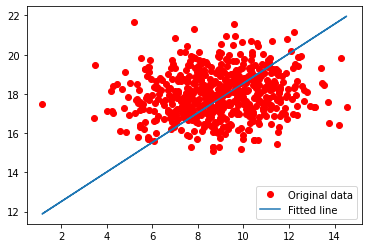

In [115]:

# Plot the graph
predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()

In [109]:
losses

[array(342.53043, dtype=float32),
 array(241.68349, dtype=float32),
 array(171.80153, dtype=float32),
 array(123.376656, dtype=float32),
 array(89.82026, dtype=float32),
 array(66.56685, dtype=float32),
 array(50.45286, dtype=float32),
 array(39.286045, dtype=float32),
 array(31.54734, dtype=float32),
 array(26.184122, dtype=float32),
 array(22.46698, dtype=float32),
 array(19.890474, dtype=float32),
 array(18.104368, dtype=float32),
 array(16.865961, dtype=float32),
 array(16.007076, dtype=float32),
 array(15.411185, dtype=float32),
 array(14.997522, dtype=float32),
 array(14.710143, dtype=float32),
 array(14.510267, dtype=float32),
 array(14.371027, dtype=float32),
 array(14.273806, dtype=float32),
 array(14.205697, dtype=float32),
 array(14.157767, dtype=float32),
 array(14.123816, dtype=float32),
 array(14.099552, dtype=float32),
 array(14.082004, dtype=float32),
 array(14.069108, dtype=float32),
 array(14.059437, dtype=float32),
 array(14.051995, dtype=float32),
 array(14.046102, 

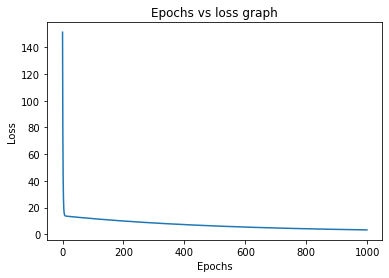

In [118]:
# plt.plot(range(epoch+1),losses)
plt.plot(range(epoch+1),losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Epochs vs loss graph')
plt.show()

In [182]:
# 2
# Linear Regression Model

# Hyper Parameters, 超参数
i=0
learning_rate = 0
lr=[]
losses = []
while(i<10):
    i=i+1
    input_size = 1
    output_size = 1
    num_epochs = 10000
    
    learning_rate = learning_rate + 0.001
    print(learning_rate)
    lr.append(learning_rate)
    
    class LinearRegression(nn.Module):
        def __init__(self, input_size, output_size):
            super(LinearRegression, self).__init__()
            self.linear = nn.Linear(input_size, output_size)  
        
        def forward(self, x):
            out = self.linear(x)
            return out

    model = LinearRegression(input_size, output_size)

    # Loss and Optimizer
    criterion = nn.MSELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    
    for epoch in range(num_epochs):
        # Convert numpy array to torch Variable
        inputs = Variable(torch.from_numpy(x_train))
        targets = Variable(torch.from_numpy(y_train))
        # inputs=x_train
        # targets=y_train

        # Forward + Backward + Optimize
        optimizer.zero_grad()  
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        
        # if (epoch+1) % 5 == 0:
        #     print ('Epoch [%d/%d], Loss: %.4f' 
        #         %(epoch+1, num_epochs, loss.data))
    losses.append(loss.detach().numpy())      
    # plt.plot(range(epoch+1),losses)
    # plt.xlabel('Epochs')
    # plt.ylabel('Loss')
    # plt.title('Epochs vs loss graph %.4f'%(learning_rate))
    # plt.show()

0.001
0.002
0.003
0.004
0.005
0.006
0.007
0.008
0.009000000000000001
0.010000000000000002


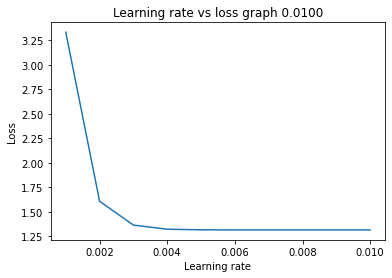

In [183]:
plt.plot(lr,losses)
plt.xlabel('Learning rate')
plt.ylabel('Loss')
plt.title('Learning rate vs loss graph %.4f'%(learning_rate))
plt.show()

In [257]:
# 3
# Linear Regression Model

# Hyper Parameters, 超参数
i=0
learning_rate = 0
lr=[]
losses = []
t1=[]
t2=[]
while(i<10):
    i=i+1
    input_size = 1
    output_size = 1
    num_epochs = 1000
    
    learning_rate = learning_rate + 0.001
    print(learning_rate)
    lr.append(learning_rate)
    
    class LinearRegression(nn.Module):
        def __init__(self, input_size, output_size):
            super(LinearRegression, self).__init__()
            self.linear = nn.Linear(input_size, output_size)  
        
        def forward(self, x):
            out = self.linear(x)
            t1.append(self.linear.bias.data)
            t2.append(self.linear.weight.data)
            return out

    model = LinearRegression(input_size, output_size)

    # Loss and Optimizer
    criterion = nn.MSELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    
    for epoch in range(num_epochs):
        # Convert numpy array to torch Variable
        inputs = Variable(torch.from_numpy(x_train))
        targets = Variable(torch.from_numpy(y_train))
        # inputs=x_train
        # targets=y_train

        # Forward + Backward + Optimize
        optimizer.zero_grad()  
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        # t1.append()
        
        # if (epoch+1) % 5 == 0:
        #     print ('Epoch [%d/%d], Loss: %.4f' 
        #         %(epoch+1, num_epochs, loss.data))
        losses.append(loss.detach().numpy())      
    # plt.plot(range(epoch+1),losses)
    # plt.xlabel('Epochs')
    # plt.ylabel('Loss')
    # plt.title('Epochs vs loss graph %.4f'%(learning_rate))
    # plt.show()

0.001
0.002
0.003
0.004
0.005
0.006
0.007
0.008
0.009000000000000001
0.010000000000000002


In [247]:
for i in range(len(t1)):
    t1[i]=t1[i].item()
    t2[i]=t2[i].item()

In [248]:
len(losses)

10000

In [252]:
print(losses[0])

320.1761


In [258]:
list1=[t1[50].item(),t1[1000].item(),t1[2000].item(),t1[3000].item(),t1[4000].item(),t1[5000].item(),t1[6000].item(),t1[7000].item(),t1[8000].item(),t1[8500].item(),t1[8999].item()]
list2=[t2[50].item(),t2[1000].item(),t2[2000].item(),t2[3000].item(),t2[4000].item(),t2[5000].item(),t2[6000].item(),t2[7000].item(),t2[8000].item(),t2[8500].item(),t2[8999].item()]
list3=[losses[50].item(),losses[1000].item(),losses[2000].item(),losses[3000].item(),losses[4000].item(),losses[5000].item(),losses[6000].item(),losses[7000].item(),losses[8000].item(),losses[8500].item(),losses[8999].item()]
print(list1)
print(list2)
print(list3)

[0.9034180045127869, 3.2944626808166504, 4.717016220092773, 5.848425388336182, 6.205519199371338, 7.424584865570068, 8.42881965637207, 8.998970031738281, 10.159189224243164, 10.159189224243164, 10.159189224243164]
[1.8381757736206055, 1.5816477537155151, 1.4290263652801514, 1.3076409101486206, 1.2693294286727905, 1.1385395526885986, 1.0307981967926025, 0.9696285128593445, 0.8451521396636963, 0.8451521396636963, 0.8451521396636963]
[16.666242599487305, 432.4424133300781, 691.7736206054688, 107.4154281616211, 98.99781799316406, 358.6132507324219, 466.049072265625, 98.42272186279297, 459.66021728515625, 7.0141472816467285, 3.758446455001831]


In [259]:
pd = []
ls = []
for i in range(10):
    pd1 = []
    # for j in x:
    pd.append(list1[i]*x_train[0]+list2[i])
    ls.append(list3[i])
    # pd.append(pd1) 

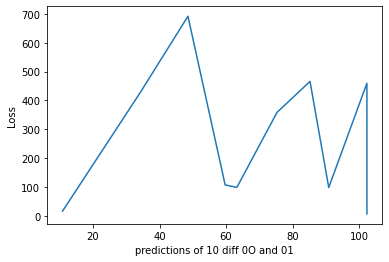

In [260]:
plt.plot(pd,ls)
plt.xlabel('predictions of 10 diff 0O and 01')
plt.ylabel('Loss')
plt.show()

In [283]:
# 1
# Train the Model 
losses = []
for epoch in range(num_epochs):
    # Convert numpy array to torch Variable
    inputs = Variable(torch.from_numpy(x_train))
    targets = Variable(torch.from_numpy(y_train))
    # inputs=x_train
    # targets=y_train

    # Forward + Backward + Optimize
    optimizer.zero_grad()  
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 5 == 0:
        print ('Epoch [%d/%d], Loss: %.4f' 
               %(epoch+1, num_epochs, loss.data))
    losses.append(loss.detach().numpy())
    print(loss.detach().numpy())
    if loss.detach().numpy() < 1.32:
        print('exiting because of no decrease in loss')
        break

296.64725
144.54593
75.08871
43.36265
Epoch [5/50000], Loss: 28.8625
28.862474
22.22673
19.181509
17.77555
17.118021
Epoch [10/50000], Loss: 16.8022
16.802216
16.64245
16.553957
16.498034
16.457003
Epoch [15/50000], Loss: 16.4228
16.422804
16.391754
16.362175
16.333284
16.304749
Epoch [20/50000], Loss: 16.2764
16.276396
16.248163
16.220009
16.191923
16.163893
Epoch [25/50000], Loss: 16.1359
16.135918
16.108
16.080128
16.052319
16.024553
Epoch [30/50000], Loss: 15.9968
15.996845
15.969188
15.941581
15.91403
15.886532
Epoch [35/50000], Loss: 15.8591
15.859078
15.831679
15.804333
15.77704
15.749795
Epoch [40/50000], Loss: 15.7226
15.722603
15.695462
15.668372
15.641333
15.614347
Epoch [45/50000], Loss: 15.5874
15.587411
15.560526
15.533687
15.506903
15.480167
Epoch [50/50000], Loss: 15.4535
15.453486
15.426849
15.400269
15.373733
15.347251
Epoch [55/50000], Loss: 15.3208
15.320815
15.294432
15.268097
15.241813
15.215578
Epoch [60/50000], Loss: 15.1894
15.189393
15.16326
15.13717
15.111133

In [293]:
#5
train_size = int(0.8 * len(my_data))
test_size = len(my_data) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(my_data, [train_size, test_size])
x_train,  y_train = train_test_split(my_data)

In [295]:
x_train,y_train

(array([[ 6.7908273, 17.102066 ],
        [10.247497 , 18.783892 ],
        [ 7.66626  , 17.735516 ],
        [ 7.5970635, 15.86544  ],
        [ 9.960774 , 15.880768 ],
        [ 8.701145 , 16.27956  ],
        [ 8.640385 , 17.32935  ],
        [ 8.226534 , 18.064457 ],
        [ 8.861454 , 17.533552 ],
        [ 9.314245 , 17.99558  ],
        [ 6.492219 , 17.435574 ],
        [ 7.3416853, 17.771528 ],
        [ 9.536117 , 18.628502 ],
        [10.608022 , 18.010277 ],
        [11.595098 , 17.56507  ],
        [10.201038 , 16.17153  ],
        [ 8.927297 , 16.634945 ],
        [ 4.2149944, 17.11326  ],
        [10.516294 , 17.822124 ],
        [ 9.147611 , 17.51909  ],
        [ 9.893835 , 16.263618 ],
        [ 6.344506 , 18.834146 ],
        [10.154567 , 17.230076 ],
        [ 7.230315 , 20.121563 ],
        [10.5029   , 19.472578 ],
        [ 8.985808 , 15.762137 ],
        [ 9.737213 , 18.975456 ],
        [10.75025  , 18.925533 ],
        [ 4.572438 , 16.087679 ],
        [11.27